In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.58  Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 15.4 GB RAM, 207.6/453.8 GB disk)


In [39]:
%matplotlib inline
from ultralytics import YOLO
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix

# Train & Val

In [3]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
source = r"C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd"
model.train(data=source, epochs=50)  # train the model

New https://pypi.org/project/ultralytics/8.0.70 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58  Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
yolo\engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd, epochs=50, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualiz

In [4]:
weight = r'C:\Users\fukud\Documents\orthopedics\script\runs\classify\2cls_8n_50epoch\weights\best.pt'
model = YOLO(weight)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.58  Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100%|██████████| 55/55 [00:01<00:00, 29.93it/s]
                   all      0.999          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\val3


# Plot Train/Val

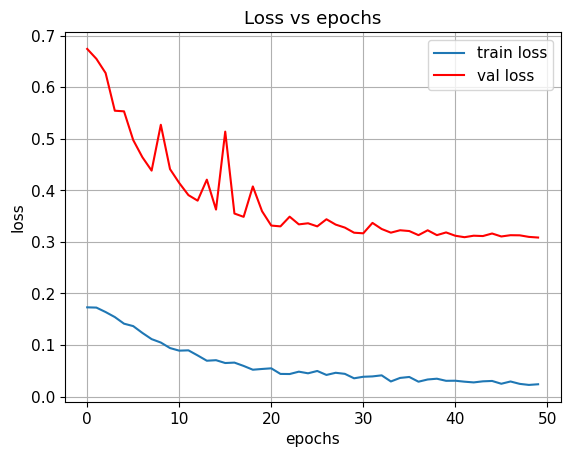

In [42]:
results_path = r'C:\Users\fukud\Documents\orthopedics\script\runs\classify\2cls_8n_50epoch\results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

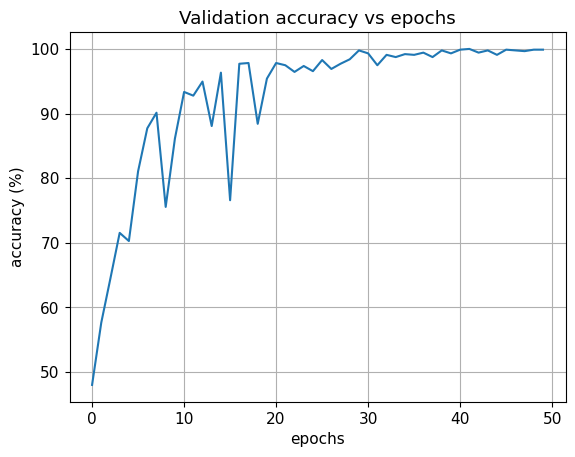

In [41]:
results = pd.read_csv(results_path)
plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# Test

In [5]:
weight = r'C:\Users\fukud\Documents\orthopedics\script\runs\classify\2cls_8n_50epoch\weights\best.pt'

In [6]:
def predict_imgs(folder_path):
    # 画像ファイルの拡張子のリスト
    img_extensions = ['.jpg']
    # フォルダ内のファイルを走査
    img_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # 拡張子が画像ファイルのものだけを取得
            if os.path.splitext(file)[1].lower() in img_extensions:
                # パスをリストに追加
                img_paths.append(os.path.join(root, file))
    # predict
    model = YOLO(weight)  # load a custom model
    pred_classes = []
    pred_probs = []
    for img in img_paths:
        results = model(img)
        probs = results[0].probs.tolist()
        pred_class = np.argmax(probs)

        pred_probs.append(probs)
        pred_classes.append(pred_class)
    
    return pred_probs, pred_classes

In [7]:
norm_folder = r'C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\normal'
pred_norm_probs, pred_norm_classes = predict_imgs(norm_folder)


image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\normal\normAL_20230401 (105).jpg: 224x224 normal 1.00, ocd 0.00, 7.7ms
Speed: 1.0ms preprocess, 7.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\normal\normAL_20230401 (106).jpg: 224x224 normal 1.00, ocd 0.00, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\normal\normAL_20230401 (11).jpg: 224x224 normal 1.00, ocd 0.00, 9.0ms
Speed: 0.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\normal\normAL_20230401 (13).jpg: 224x224 normal 1.00, ocd 0.00, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

ima

In [8]:
ocd_folder = r'C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\ocd'
pred_ocd_probs, pred_ocd_classes = predict_imgs(ocd_folder)


image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\ocd\ocd2_ocd_AL (108).jpg: 224x224 normal 0.89, ocd 0.11, 8.4ms
Speed: 1.0ms preprocess, 8.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\ocd\ocd2_ocd_AL (109).jpg: 224x224 ocd 1.00, normal 0.00, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\ocd\ocd2_ocd_AL (114).jpg: 224x224 ocd 1.00, normal 0.00, 8.4ms
Speed: 1.0ms preprocess, 8.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Documents\orthopedics\data\ocd_classify_nor_vs_ocd\test\ocd\ocd2_ocd_AL (115).jpg: 224x224 ocd 1.00, normal 0.00, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\fukud\Docume

# Confusion Matrix

In [9]:
# norm:0, ocd:1
actual_norm_classes = np.zeros(len(pred_norm_classes))
actual_ocd_classes = np.ones(len(pred_ocd_classes))

all_actual_classes = np.concatenate([actual_norm_classes, actual_ocd_classes])
all_pred_classes = np.concatenate([pred_norm_classes, pred_ocd_classes])

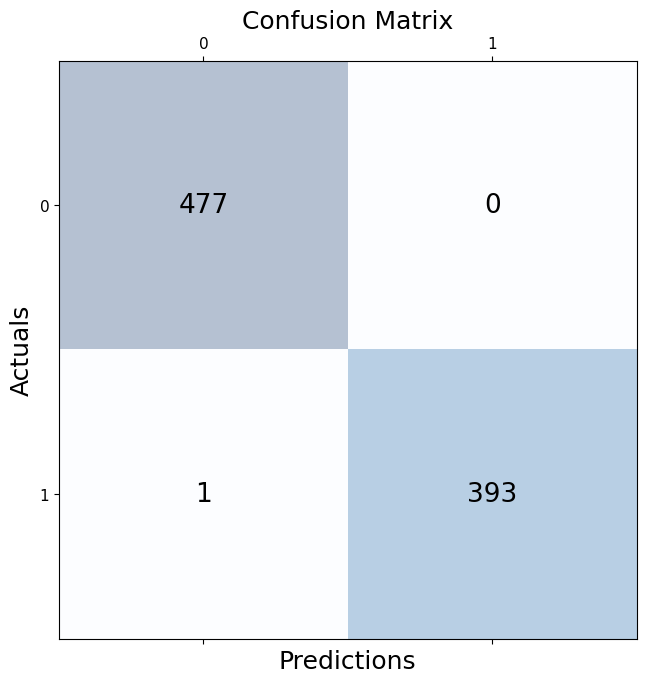

In [12]:
conf_matrix = confusion_matrix(y_true=all_actual_classes, y_pred=all_pred_classes)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# ROC

In [35]:
classes = ["normal", "ocd"]
n_classes = len(classes)
vector = np.vectorize(np.int_)
all_actual_classes_vector = vector(all_actual_classes)
all_actual_classes_one_hot = np.eye(n_classes)[all_actual_classes_vector]
all_pred_probs = np.concatenate([pred_norm_probs, pred_ocd_probs])

In [22]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_actual_classes_one_hot[:, i], all_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

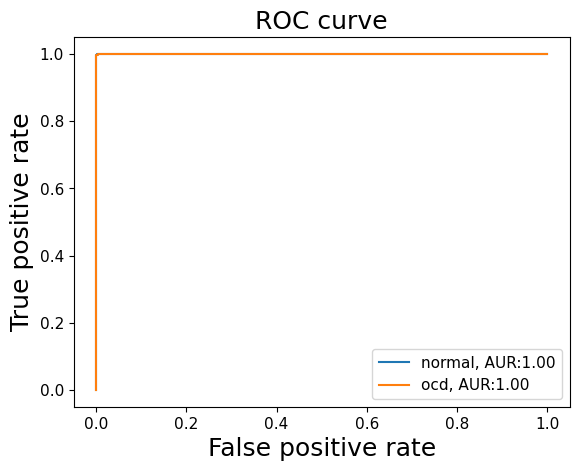

In [37]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]}, AUR:{roc_auc_score(all_actual_classes_one_hot[:, i], all_pred_probs[:, i]):.2f}')

plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend()
plt.show()